In [4]:
import numpy as np
from scipy.optimize import minimize
import scipy.stats as stats
import pandas as pd
import statsmodels.api as sm

In [3]:
tb = pd.read_excel(r'C:\Users\tyagir01\Desktop\Mle.xlsx')
tb

,Id,Y,X
0,1,2,1
1,2,6,4
2,3,7,5
3,4,9,6
4,5,15,9


In [5]:
x = tb['X']
y = tb['Y']
x2 = sm.add_constant(x)
md = sm.OLS(y,x2).fit()
print(md.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                     145.9
Date:                Tue, 12 May 2020   Prob (F-statistic):            0.00122
Time:                        18:46:35   Log-Likelihood:                -4.5811
No. Observations:                   5   AIC:                             13.16
Df Residuals:                       3   BIC:                             12.38
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2882      0.755     -0.382      0.7

C:\Users\tyagir01\Anaconda3\lib\site-packages\statsmodels\stats\stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  "samples were given." % int(n), ValueWarning)


In [8]:
err = md.resid
err

0    0.670588
1   -0.182353
2   -0.800000
3   -0.417647
4    0.729412
dtype: float64

In [10]:
# standard deviation of error term
np.std(err)

0.6048820983804831

In [11]:
# Code for parameter estimation through Maximum Likelihood method

In [23]:
import numpy as np
import matplotlib.pyplot as plt

def lklh(parameters):
    m = parameters[0]
    b = parameters[1]
    sigma = parameters[2]
    
    for i in np.arange(0, len(x)):
        y_exp = m*x + b
        
    L=(len(x)/2*np.log(2*np.pi) + len(x)/2*np.log(sigma**2)+1 / (2*sigma**2)*sum((y - y_exp)**2))
    return L

x = np.array([1,4,5,6,9])
y = np.array([2,6,7,9,15])

lklh_model = minimize(lklh, np.array([2,3,1]), method = 'L-BFGS-B')

In [24]:
lklh_model

      fun: 4.581084072772596
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([-3.67705866e-05, -3.37507799e-06, -2.23820962e-05])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 88
      nit: 18
   status: 0
  success: True
        x: array([ 1.61764683, -0.28823444,  0.60488128])

In [25]:
lklh_model.x

array([ 1.61764683, -0.28823444,  0.60488128])

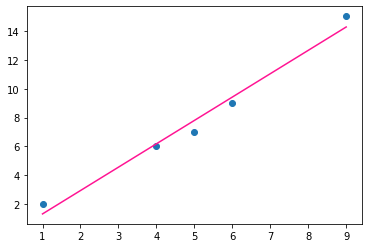

In [28]:
plt.scatter(x,y)
plt.plot(x, lklh_model['x'][0] * x + lklh_model['x'][1] , color = "deeppink")
plt.show()

In [30]:
# to find different minimize method 
minimize?